In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/project.csv")

In [ ]:
df=df.drop('customerID',axis=1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.gender=df.gender.map({'Female':0,'Male':1})

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15'

In [ ]:
temp=["Partner","PhoneService","PaperlessBilling","Churn","Dependents"]
for i in temp:
  df[i]=df[i].map({'Yes':1,'No':0})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
temp=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
for i in temp:
  ohe=OneHotEncoder(drop='first')
  temp1=ohe.fit_transform(df[i].values.reshape(-1,1)).toarray()
  df.drop(i,axis=1,inplace=True)
  for j in range(temp1.shape[1]):
    df[i+str(j)]=temp1[:,j]


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport1,StreamingTV0,StreamingTV1,StreamingMovies0,StreamingMovies1,Contract0,Contract1,PaymentMethod0,PaymentMethod1,PaymentMethod2
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

<Axes: ylabel='Density'>

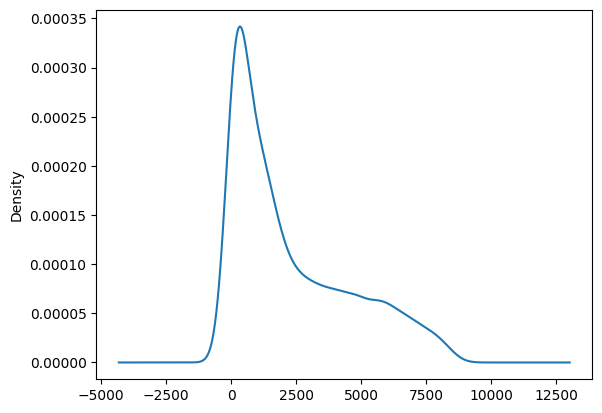

In [ ]:
df.TotalCharges.plot(kind='kde')

In [ ]:
df=df.dropna(subset=["TotalCharges"])

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


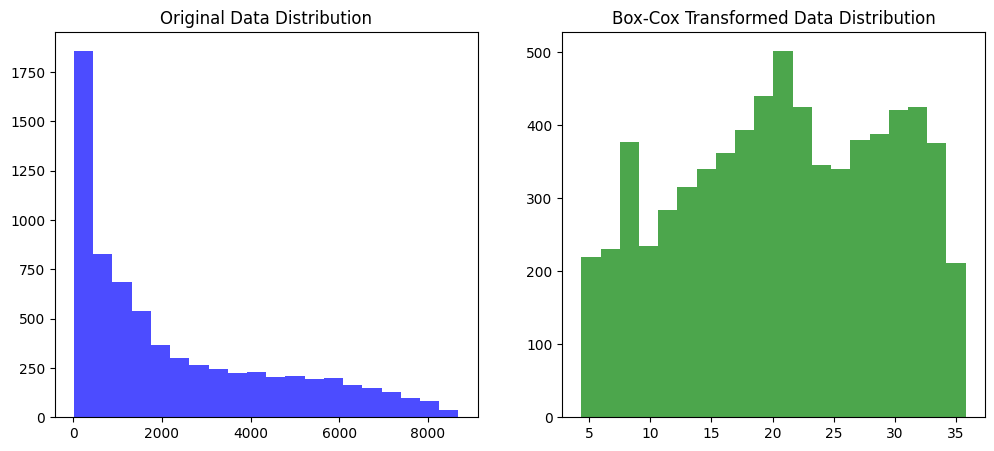

Optimal λ: 0.2553740737602896


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
data = df.TotalCharges

# Step 1: Check and adjust data to be positive
# (Assuming all values are positive for this example)

# Step 2: Apply Box-Cox transformation
transformed_data, lambda_optimal = stats.boxcox(data)

# Step 3: Plot original vs transformed data
plt.figure(figsize=(12, 5))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, alpha=0.7, color='blue')
plt.title('Original Data Distribution')

# Transformed data histogram
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, alpha=0.7, color='green')
plt.title('Box-Cox Transformed Data Distribution')

plt.show()

# Print the optimal lambda
print(f'Optimal λ: {lambda_optimal}')


In [ ]:
df.TotalCharges=transformed_data

<ipython-input-16-c17e6e6ea4e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=transformed_data


<Axes: ylabel='Density'>

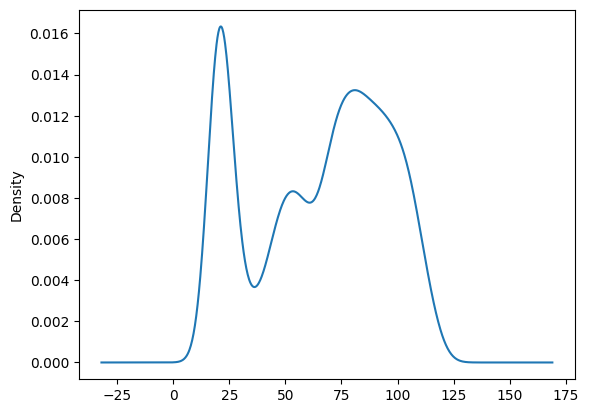

In [ ]:
df.MonthlyCharges.plot(kind='kde')

<Axes: ylabel='Density'>

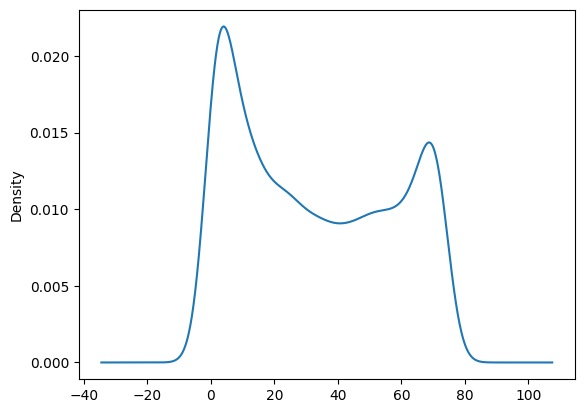

In [ ]:
df["tenure"].plot(kind='kde')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
df['Cluster'] = kmeans.fit_predict(df[['MonthlyCharges']])
df["Cluster_2"]=kmeans.fit_predict(df[['tenure']])

<ipython-input-19-4ca71d444707>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df[['MonthlyCharges']])
<ipython-input-19-4ca71d444707>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster_2"]=kmeans.fit_predict(df[['tenure']])


In [ ]:
df.Cluster.value_counts()

,count
Cluster,
0,4137
1,2873


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines0', 'MultipleLines1', 'InternetService0',
       'InternetService1', 'OnlineSecurity0', 'OnlineSecurity1',
       'OnlineBackup0', 'OnlineBackup1', 'DeviceProtection0',
       'DeviceProtection1', 'TechSupport0', 'TechSupport1', 'StreamingTV0',
       'StreamingTV1', 'StreamingMovies0', 'StreamingMovies1', 'Contract0',
       'Contract1', 'PaymentMethod0', 'PaymentMethod1', 'PaymentMethod2',
       'Cluster', 'Cluster_2'],
      dtype='object')

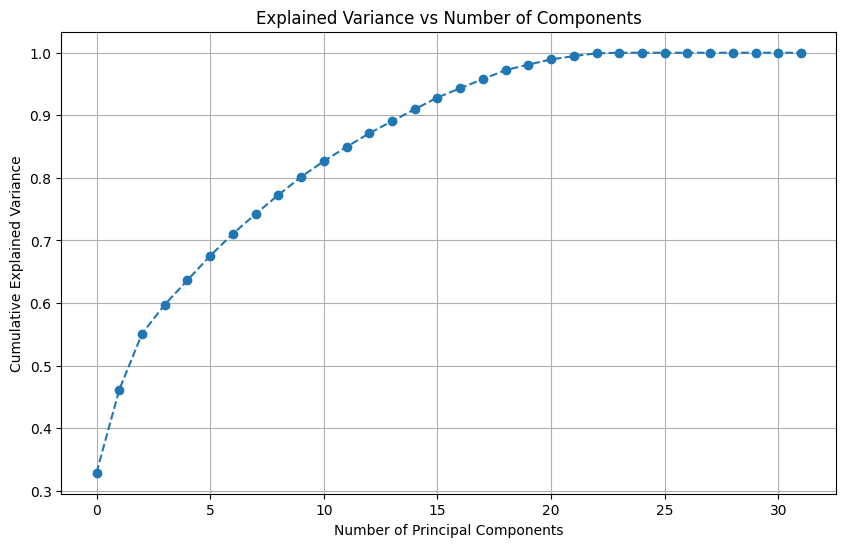

Transformed Training Data Shape: (5608, 20)
Transformed Testing Data Shape: (1402, 20)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your feature set and y is your target
X = df.drop('Churn', axis=1)  # Replace 'Churn' with your target variable
y = df['Churn']  # Replace with your actual target variable

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA on the scaled training data without specifying the number of components
pca = PCA()
pca.fit(X_train_scaled)

# Step 4: Calculate the explained variance ratio (eigenvalues) and plot it
explained_variance = pca.explained_variance_ratio_

# Plot the cumulative explained variance to decide the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Step 5: Transform the training and test sets using PCA

n_components = 20
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Output the transformed shapes
print("Transformed Training Data Shape:", X_train_pca.shape)
print("Transformed Testing Data Shape:", X_test_pca.shape)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

In [ ]:
class_weights

array([0.6801863 , 1.88745288])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6432 - loss: 2.9972 - recall: 0.3052
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6078 - loss: 2.6963 - recall: 0.5787
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6328 - loss: 2.4464 - recall: 0.6847
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6513 - loss: 2.2421 - recall: 0.7088
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6661 - loss: 2.0568 - recall: 0.7190
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6894 - loss: 1.8972 - recall: 0.7704
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6803 - loss: 1.7598 - recall: 0.7668
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7001 - loss: 1.6392 - recall: 0.7945
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7228 - loss: 1.5119 - recall: 0.8008
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

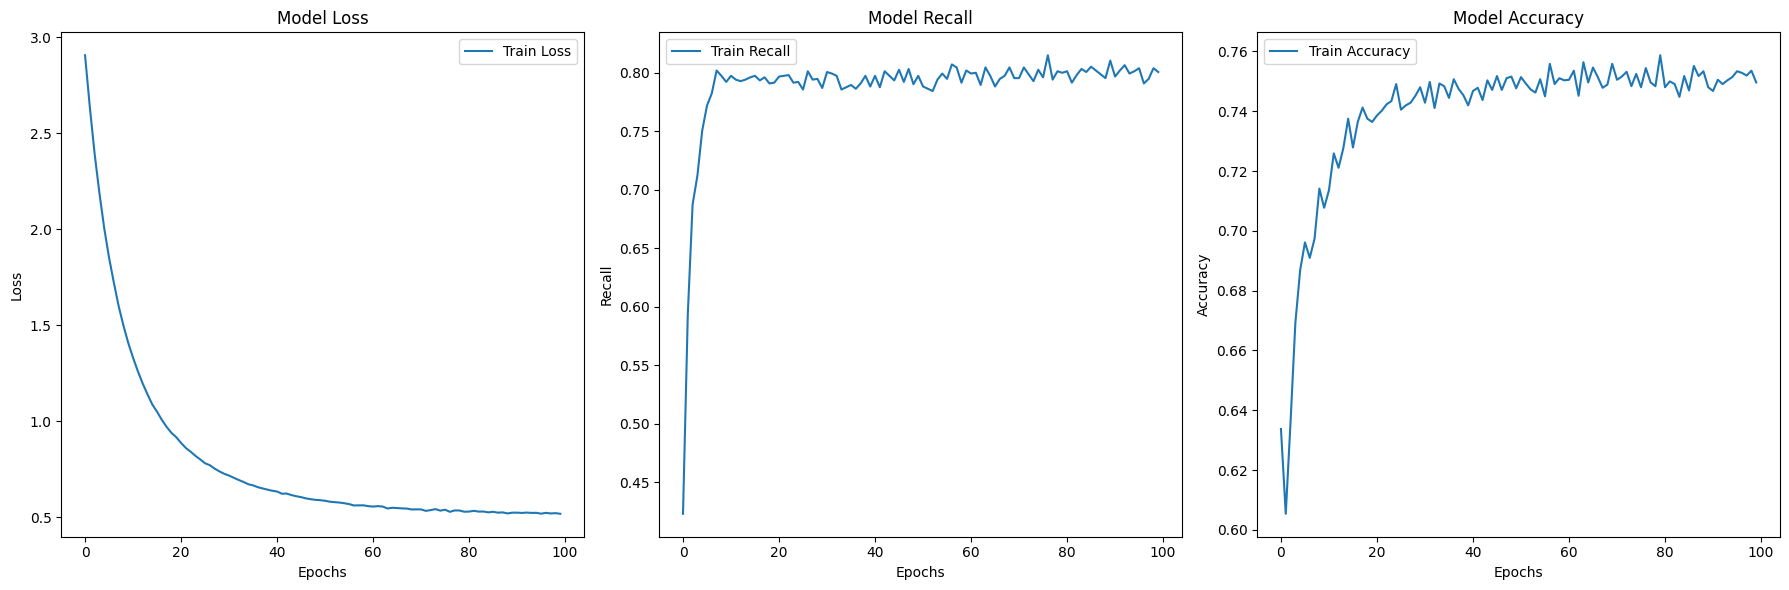

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Recall, Accuracy

class_weight_dict = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weight_dict))

model1 = Sequential()
model1.add(Dense(30, activation='relu', input_shape=(X_train_pca.shape[1],)))
model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))


model1.compile(optimizer=SGD(learning_rate=0.008),
               loss='binary_crossentropy',
               metrics=[Recall(), 'accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

history = model1.fit(X_train_pca, np.array(y_train), epochs=100, batch_size=32, verbose=1,
                     callbacks=[early_stopping], class_weight=class_weight_dict)


loss, recall, accuracy = model1.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss}, Test Recall: {recall}, Test Accuracy: {accuracy}")


plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['recall'], label='Train Recall')
plt.title('Model Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6707 - loss: 1.5681
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7529 - loss: 1.1826
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.9668
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7677 - loss: 0.8192
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7668 - loss: 0.7155
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7687 - loss: 0.6436
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7780 - loss: 0.5838
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.5489
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.5227
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4993
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4952
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

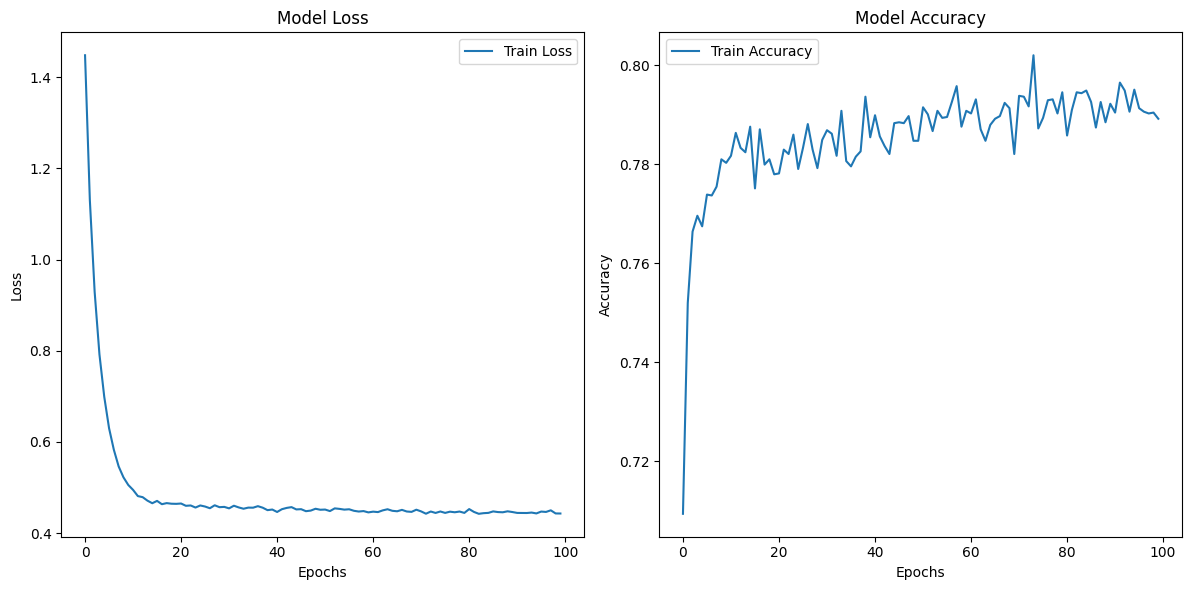

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Precision

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model2.add(Dropout(0.5))

model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.3))
model2.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9,nesterov=True),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

history = model2.fit(X_train_pca, y_train, epochs=100, batch_size=64, verbose=1, callbacks=[early_stopping])

loss, accuracy = model2.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
predictions_final_2=model2.predict(X_test_pca)
predictions_final_2=(predictions_final_2>0.5).astype(int)
print(classification_report(y_test, predictions_final_2))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1081
           1       0.62      0.50      0.56       321

    accuracy                           0.82      1402
   macro avg       0.74      0.71      0.72      1402
weighted avg       0.81      0.82      0.81      1402



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict on the test set
predictions_1 = model1.predict(X_test_pca)
predictions_2=model2.predict(X_test_pca)

# Convert probabilities to binary predictions
predictions_final_1 = (predictions_1 > 0.5).astype(int)
predictions_final_2=(predictions_2>0.5).astype(int)

# Calculate metrics
accuracy_1 = accuracy_score(y_test, predictions_final_1)
precision_1 = precision_score(y_test, predictions_final_1)
recall_1 = recall_score(y_test, predictions_final_1)

accuracy_2 = accuracy_score(y_test, predictions_final_2)
precision_2 = precision_score(y_test, predictions_final_2)
recall_2 = recall_score(y_test, predictions_final_2)


print(accuracy_1,precision_1,recall_1)
print(accuracy_2,precision_2,recall_2)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.7524964336661911 0.475 0.7694704049844237
0.8166904422253923 0.624031007751938 0.5015576323987538


In [ ]:
predictions_1_train = model1.predict(X_train_pca)
predictions_2_train=model2.predict(X_train_pca)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm1= confusion_matrix(y_test, predictions_final_1)
cm2=confusion_matrix(y_test, predictions_final_2)

print(cm1,'\n',cm2)

[[808 273]
 [ 74 247]] 
 [[984  97]
 [160 161]]


In [ ]:
y_x=(predictions_1+predictions_2)/2
y_x_1=(y_x>0.5).astype(int)
cm3=confusion_matrix(y_test,y_x_1)
print(cm3)

[[920 161]
 [108 213]]


In [ ]:
print(classification_report(y_test,y_x_1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1081
           1       0.57      0.66      0.61       321

    accuracy                           0.81      1402
   macro avg       0.73      0.76      0.74      1402
weighted avg       0.82      0.81      0.81      1402



In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Define a function to apply thresholds and calculate both F1 scores
def apply_new_threshold(prediction_2, y_true, initial_threshold=0.5):
    best_f1 = 0.0
    best_weighted_f1 = 0.0
    best_threshold_f1 = initial_threshold
    best_weighted_threshold = initial_threshold
    thresholds = np.arange(0.1, 0.9, 0.01)

    for threshold in thresholds:
        y_pred_new = (y_x >= threshold).astype(int)  # Apply new threshold


        f1 = f1_score(y_true, y_pred_new)


        # Check for best F1 score
        if f1 > best_f1:
            best_f1 = f1
            best_threshold_f1 = threshold



    return best_threshold_f1, best_f1

(best_threshold_f1, best_f1)= apply_new_threshold(y_x, y_test)


print(f"Best Threshold for F1 Score: {best_threshold_f1}, Best F1 Score: {best_f1}")

y_pred_final_f1 = (y_x >= best_threshold_f1).astype(int)



Best Threshold for F1 Score: 0.46999999999999986, Best F1 Score: 0.6175243393602226


In [ ]:
print(classification_report(y_test,y_pred_final_f1))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1081
           1       0.56      0.69      0.62       321

    accuracy                           0.80      1402
   macro avg       0.73      0.76      0.74      1402
weighted avg       0.82      0.80      0.81      1402



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4}
Best Score: 0.7819156565391545


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_params = grid_search.best_params_

best_dt = DecisionTreeClassifier(**best_params,class_weight='balanced')

best_dt.fit(X_train_pca, y_train)

y_pred_dt = best_dt.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy:", accuracy)
print(precision_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Test Accuracy: 0.6990014265335235
0.4176182707993475
0.7975077881619937
[[724 357]
 [ 65 256]]


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1081
           1       0.42      0.80      0.55       321

    accuracy                           0.70      1402
   macro avg       0.67      0.73      0.66      1402
weighted avg       0.80      0.70      0.72      1402



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'none']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.808416547788873


In [ ]:
best_lr = LogisticRegression(**grid_search.best_params_, max_iter=2000,class_weight={0:1,1:1.5})  # Increase max_iter
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", accuracy)
print(precision_score(y_test, y_pred_lr))
print(recall_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Test Accuracy: 0.8095577746077033
0.5718085106382979
0.6697819314641744
[[920 161]
 [106 215]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1081
           1       0.57      0.67      0.62       321

    accuracy                           0.81      1402
   macro avg       0.73      0.76      0.75      1402
weighted avg       0.82      0.81      0.81      1402



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
Best Score: 0.801283880171184


In [ ]:


best_params = grid_search.best_params_

best_rf = RandomForestClassifier(**best_params)

best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", accuracy)
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Test Accuracy: 0.8245363766048502
0.6404494382022472
0.5327102803738317
[[985  96]
 [150 171]]


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1081
           1       0.64      0.53      0.58       321

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.74      1402
weighted avg       0.82      0.82      0.82      1402

